<a href="https://colab.research.google.com/github/ronaldoyw/Exploratory-Data-Analysis/blob/main/US_Accidents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# US Accidents Exploratory Data Analysis

*   Information on US Accidents
*   Can be used to prevent accidents



## Download the *Data*

In [ ]:
!pip install opendatasets


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od

download_url = 'https://www.kaggle.com/sobhanmoosavi/us-accidents'

od.download(download_url)

Skipping, found downloaded files in "./us-accidents" (use force=True to force download)


## Data preparation and cleaning



*   Load the file using pandas
*   Look at some information about the file
*   Fix any missing or incorrent values 






In [ ]:
import pandas as pd

df = pd.read_csv('/content/us-accidents/US_Accidents_Dec21_updated.csv')
df.head()



,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [ ]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
df.City.unique()

array(['Dublin', 'Dayton', 'Cincinnati', ..., 'Clarksdale', 'Bridgeboro',
       'American Fork-Pleasant Grove'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [ ]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include = numerics)
len(numeric_df.columns)

14

Percentage of missing values per column

In [ ]:
missing_percentages = df.isna().sum().sort_values(ascending= False) / len(df)
missing_percentages

Number                   6.129003e-01
Precipitation(in)        1.931079e-01
Wind_Chill(F)            1.650568e-01
Wind_Speed(mph)          5.550967e-02
Wind_Direction           2.592834e-02
Humidity(%)              2.568830e-02
Weather_Condition        2.482514e-02
Visibility(mi)           2.479350e-02
Temperature(F)           2.434646e-02
Pressure(in)             2.080593e-02
Weather_Timestamp        1.783125e-02
Airport_Code             3.356011e-03
Timezone                 1.285961e-03
Nautical_Twilight        1.007612e-03
Civil_Twilight           1.007612e-03
Sunrise_Sunset           1.007612e-03
Astronomical_Twilight    1.007612e-03
Zipcode                  4.635647e-04
City                     4.814887e-05
Street                   7.029032e-07
Country                  0.000000e+00
Junction                 0.000000e+00
Start_Time               0.000000e+00
End_Time                 0.000000e+00
Start_Lat                0.000000e+00
Turning_Loop             0.000000e+00
Traffic_Sign

In [ ]:
type(missing_percentages)

pandas.core.series.Series

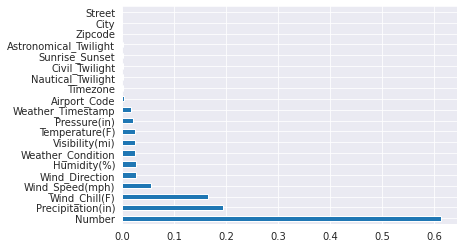

In [ ]:
missing_percentages[missing_percentages != 0].plot(kind = 'barh')

In [ ]:
df['Number']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
           ..
2845337   NaN
2845338   NaN
2845339   NaN
2845340   NaN
2845341   NaN
Name: Number, Length: 2845342, dtype: float64

## Exploratory Analysis & Visualization

In [ ]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

Columns to analyze:


*   City
*   Start time
*   Start_Lat, Start_Lng
*   Temperature
*   Weather_condtion
*   







### City

In [ ]:
cities = df.City.unique()
len(cities)

11682

In [ ]:
cities_by_accident = df.City.value_counts()
cities_by_accident[:20]

Miami           106966
Los Angeles      68956
Orlando          54691
Dallas           41979
Houston          39448
Charlotte        33152
Sacramento       32559
San Diego        26627
Raleigh          22840
Minneapolis      22768
Portland         20944
Nashville        20267
Austin           18301
Baton Rouge      18182
Phoenix          17143
Saint Paul       16869
New Orleans      16251
Atlanta          15622
Jacksonville     14967
Richmond         14349
Name: City, dtype: int64

In [ ]:
'New York' in df.City.unique()

True

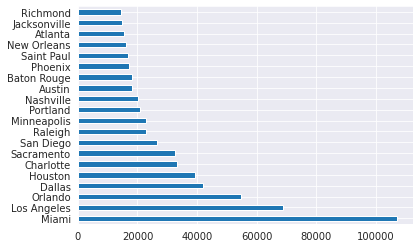

In [ ]:
cities_by_accident[:20].plot(kind = 'barh')

In [ ]:
import seaborn as sns

sns.set_style('darkgrid')

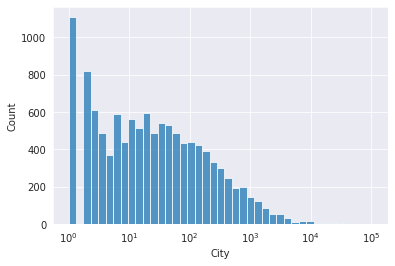

In [ ]:
sns.histplot(cities_by_accident, log_scale = True)

In [ ]:
high_accident_cities =cities_by_accident[cities_by_accident >= 1000]
low_accident_cities = cities_by_accident[cities_by_accident < 1000]

In [ ]:
len(high_accident_cities) / len(cities)

0.04245848313644924

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


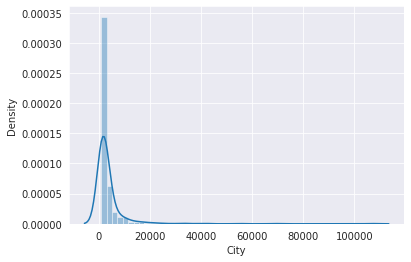

In [ ]:
sns.distplot(high_accident_cities)

In [ ]:
len(low_accident_cities) / len(cities)

0.9574559150830337

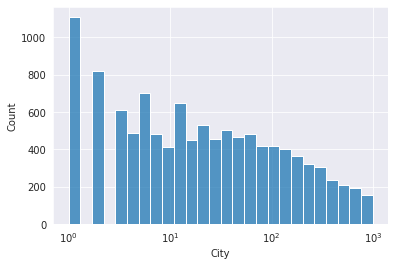

In [ ]:
sns.histplot(low_accident_cities, log_scale = True)

In [ ]:
cities_by_accident = cities_by_accident[cities_by_accident == 1]
cities_by_accident

Carney                          1
Waverly Hall                    1
Center Sandwich                 1
Glen Flora                      1
Sulphur Springs                 1
                               ..
Ridgedale                       1
Sekiu                           1
Wooldridge                      1
Bullock                         1
American Fork-Pleasant Grove    1
Name: City, Length: 1110, dtype: int64

### Start Time

In [ ]:
df.Start_Time

0         2016-02-08 00:37:08
1         2016-02-08 05:56:20
2         2016-02-08 06:15:39
3         2016-02-08 06:51:45
4         2016-02-08 07:53:43
                  ...        
2845337   2019-08-23 18:03:25
2845338   2019-08-23 19:11:30
2845339   2019-08-23 19:00:21
2845340   2019-08-23 19:00:21
2845341   2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: datetime64[ns]

In [ ]:
df.Start_Time = pd.to_datetime(df.Start_Time)
df.Start_Time

0         2016-02-08 00:37:08
1         2016-02-08 05:56:20
2         2016-02-08 06:15:39
3         2016-02-08 06:51:45
4         2016-02-08 07:53:43
                  ...        
2845337   2019-08-23 18:03:25
2845338   2019-08-23 19:11:30
2845339   2019-08-23 19:00:21
2845340   2019-08-23 19:00:21
2845341   2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: datetime64[ns]

In [ ]:
df.Start_Time.dt.hour

0           0
1           5
2           6
3           6
4           7
           ..
2845337    18
2845338    19
2845339    19
2845340    19
2845341    18
Name: Start_Time, Length: 2845342, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


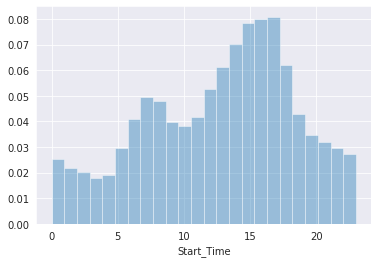

In [ ]:
sns.distplot(df.Start_Time.dt.hour, bins = 24, kde = False, norm_hist = True)

- A high percentage of accidents occur between 6am to 10am. Probably people in a hurry to get to work.
- Next highest percentage is 3pm to 6pm

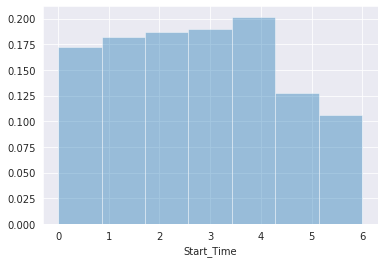

In [ ]:
sns.distplot(df.Start_Time.dt.dayofweek, bins = 7, kde = False, norm_hist = True)

Is the distribution of accidents by hour the same on weekends as on weekdays?

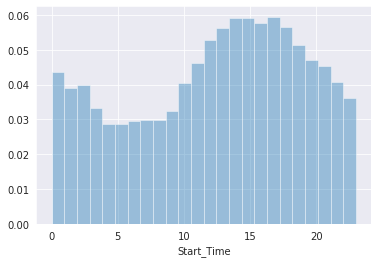

In [ ]:
sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.distplot(sundays_start_time.dt.hour, bins = 24, kde = False, norm_hist = True)

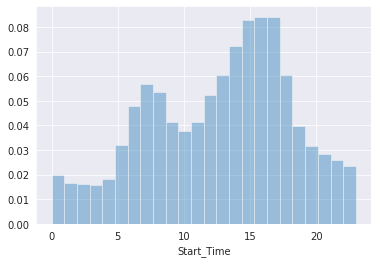

In [ ]:
mondays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.distplot(mondays_start_time.dt.hour, bins = 24, kde = False, norm_hist = True)

On Sundays, the peak occurs between 10am and 3pm, unlike weekdays

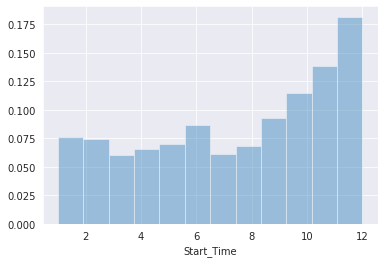

In [ ]:
sns.distplot(df.Start_Time.dt.month, bins = 12, kde = False, norm_hist = True)

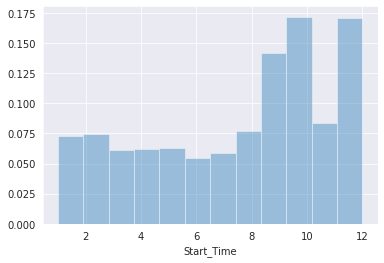

In [ ]:
df_2019 = df[df.Start_Time.dt.year == 2019]

sns.distplot(df_2019.Start_Time.dt.month, bins = 12, kde = False, norm_hist = True)

- Much data is missing for 2016 and 2020.
- It is important to also check the source
- Consider excluding a source that is not accurate or seems to have issues (faulty)

### Start Latitude & Longitude

In [ ]:
df.Start_Lat

0          40.108910
1          39.865420
2          39.102660
3          41.062130
4          39.172393
             ...    
2845337    34.002480
2845338    32.766960
2845339    33.775450
2845340    33.992460
2845341    34.133930
Name: Start_Lat, Length: 2845342, dtype: float64

In [ ]:
df.Start_Lng

0          -83.092860
1          -84.062800
2          -84.524680
3          -81.537840
4          -84.492792
              ...    
2845337   -117.379360
2845338   -117.148060
2845339   -117.847790
2845340   -118.403020
2845341   -117.230920
Name: Start_Lng, Length: 2845342, dtype: float64

In [ ]:
sample_df = df.sample(int(0.1 * len(df)))

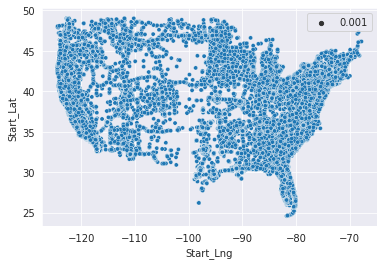

In [ ]:
sns.scatterplot(x=sample_df.Start_Lng, y=sample_df.Start_Lat, size = 0.001)

In [ ]:
import folium

In [ ]:
lat, lng = df.Start_Lat[0], df.Start_Lng[0]
lat, lng

(40.10891, -83.09286)

In [ ]:
list(zip(list(df.Start_Lat), list(df.Start_Lng))) 

[(40.10891, -83.09286),
 (39.86542, -84.0628),
 (39.10266, -84.52468),
 (41.06213, -81.53784),
 (39.172393, -84.49279200000002),
 (39.06324, -84.03243),
 (39.77565, -84.18603),
 (41.37531, -81.82016999999998),
 (40.702247, -84.075887),
 (40.10931, -82.96849),
 (39.19288, -84.47723),
 (39.13877, -84.53394),
 (41.4739, -81.704233),
 (39.582242, -83.677814),
 (40.151785, -81.312635),
 (40.151747, -81.312682),
 (39.97241, -82.84695),
 (39.9838, -82.85656999999998),
 (40.02664, -82.9944),
 (41.679361, -83.573037),
 (40.99613, -85.26613),
 (39.0381, -84.59243000000002),
 (40.03386, -82.99601),
 (39.85798, -84.28181),
 (39.15267, -84.5395),
 (39.30732, -85.95982),
 (39.77572, -84.04815),
 (39.97643, -83.12306),
 (39.58595, -85.82518),
 (39.3638, -85.51659000000002),
 (39.45132, -85.62516),
 (39.75067, -84.14148),
 (39.2675, -81.49929),
 (39.86025, -85.96623000000002),
 (41.95677, -83.67214),
 (38.27401, -85.74844),
 (41.95677, -83.67214),
 (40.52225, -80.06666),
 (40.487814, -80.009439),
 (40

In [ ]:
from folium import plugins

from folium.plugins import HeatMap

In [ ]:
sample_df1 = df.sample(int(0.001 * len(df)))
lat_lng_pairs = list(zip(list(sample_df1.Start_Lat), list(sample_df1.Start_Lng)))

In [ ]:
map = folium.Map()
HeatMap(lat_lng_pairs).add_to(map)
map

In [ ]:
map = folium.Map()
HeatMap(zip(list(df.Start_Lat), list(df.Start_Lng))).add_to(map)
map

## Ask & Answer questions


1.   Are there more accidents in warmer or colder areas?
2.   Which states have the highest number of accidents? How about per capita?
3.   Around what time are there most accidents?
4.   Does New York show up int the data? If yes, why is the count lower if this is the most populated city in the US?
5.   Among the top 100 cities with the highest accidents, which states have the highest number of accidents?
6.   What time of the day are accidents most frequent in?
7.   What days of the week have the most accidents?
8.   Which months have the most accidents.
9.   What is the trend of accidents year over year? (increasing/decreasing
10.  When is accidents per unit of traffic highest? 





## Summary and Conclusion

Insights:
-  Less than 5% of cities have more than 1000 yearly accidents
-  The number of accidents per city decreases exponentially
-  New York, with the highest population in the US, is not in the top 20 cities with high accidents
- 1100 cities have reported 1 accident(need to investigate)
